In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig()
log = logging.getLogger()
log.setLevel(logging.INFO)
import librosa
import sys
sys.path.append('../')


<img src="src/wave-basic.png" alt="Basic of sine wave" width="600"/>  

[link](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.01-The-Basics-of-waves.html)

In [2]:
def amp_to_db(amp):
    """Convert Amplitude to Decibel"""

    return 20 * np.log10(amp)

def get_sine(A: float, freq: int, phase: int, length: float, sr: int):
    """Get a sine wave

    Parameters
    ----------
        A: Amplitude
        freq: value in hertz
        phase: phase shift in hertz
        T: time limit for wave generation 
        sr: sample rate
    """
    
    logging.info(f"Decibel: {amp_to_db(amp=A)}")

    t = np.linspace(0, length, sr*length)
    return t, A * np.sin(2 * np.pi * freq * t)

In [46]:
# Low Sample rate; rugged plot; SD quality
wav_sd = get_sine(A=20, freq=20, phase=0, length=1, sr=46000)

# High Sample rate; rugged plot; HD quality
wav_hd = get_sine(A=3, freq=1000, phase=0, length=10, sr=46000)


INFO:root:Decibel: 26.020599913279625
INFO:root:Decibel: 9.542425094393248


Text(0.5, 1.0, 'High Sample rate | HD Quality')

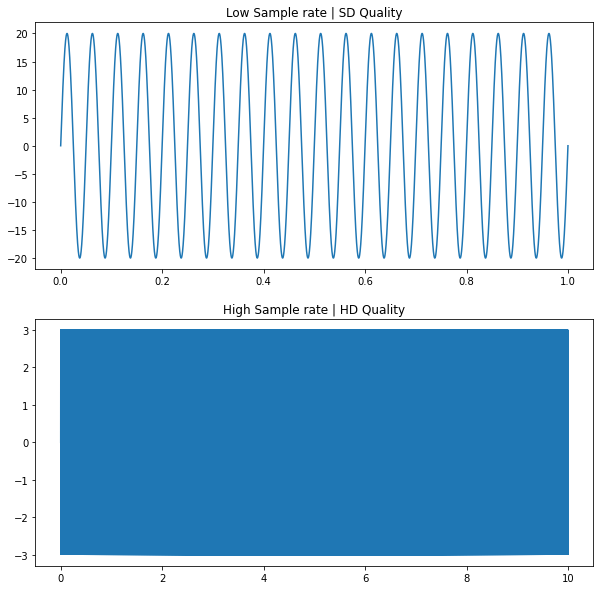

In [48]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(*wav_sd)
ax[0].set_title("Low Sample rate | SD Quality")

ax[1].plot(*wav_hd)
ax[1].set_title("High Sample rate | HD Quality")


# How does it sound?

In [53]:
# For jupyter notebook
from IPython.display import Audio
# sample_wav, rate = librosa.load("tmp/check.wav")

Audio(wav_hd[1], rate=46000)

In [48]:
# For Visual Studio code
from vs_audio import Audio
Audio(wav_hd[1], sr=100)

In [39]:
import soundfile as sf
sf.write("tmp/check.wav", wav_hd[1], 46000)